# Inspect & evaluate MCMC models

## Imports

In [1]:
import numpy as np
import scipy as sp
import cPickle as pickle
import phdmcmc
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.lensing import LensModel
from gleam.lensobject import LensObject
from gleam.reconsrc import ReconSrc, run_model
from gleam.utils.plotting import plot_scalebar, plot_labelbox
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()


In [2]:
with open("mcmc.pkl", 'rb') as f:
    full_acc, full_rej, full_probs, full_priors, full_n_acc = pickle.load(f)
acc, rej, probs, priors = phdmcmc.flat_chain(full_acc, full_rej, full_probs, full_priors, full_n_acc, discard=0.1)

In [3]:
dimstr = "Ndims:     \t{}".format(acc.shape[-1])
nwkstr = "Nwalkers:  \t{}".format(full_acc.shape[0])
accstr = "Accepted:  \t{}".format(acc.shape[0])
rejstr = "Rejected:  \t{}".format(rej.shape[0])
prcstr = "Acceptance:\t{:5.2f}%".format((100.*acc.shape[0])/(acc.shape[0]+rej.shape[0]))
print(dimstr)
print(nwkstr)
print(accstr)
print(rejstr)
print(prcstr)

imax = np.argmax(probs)
mlkstr = "Maximum likelihood: {:6.4f}".format(float(acc[imax]))
print(mlkstr)

peaks, _ = sp.signal.find_peaks(probs, distance=len(probs)//15)
# print(acc[peaks])
kmeans = KMeans(n_clusters=2).fit(acc[peaks])
ifits = kmeans.cluster_centers_
print(ifits)

Ndims:     	1
Nwalkers:  	360
Accepted:  	14093
Rejected:  	2525
Acceptance:	84.81%
Maximum likelihood: 93.5278
[[271.3139 ]
 [ 91.79312]]


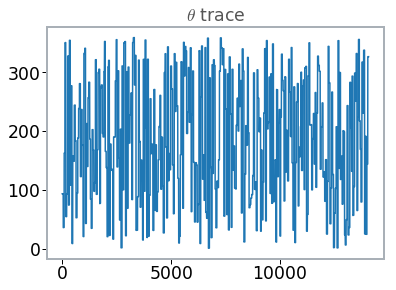

In [4]:
plt.plot(acc, color='tab:blue')
plt.title(r'$\theta$ trace')
plt.show()

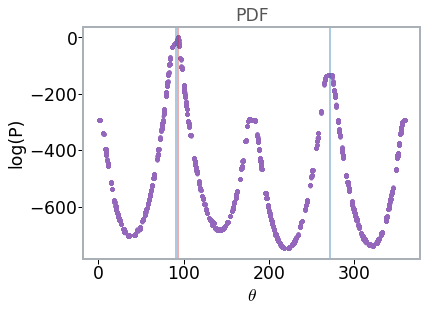

In [5]:
plt.plot(acc, probs, marker='.', lw=0, color='tab:purple')
for ti in ifits:
    plt.axvline(ti, color='tab:blue', alpha=0.5)
plt.axvline(acc[imax], color='tab:red', alpha=0.5)
plt.title(r'PDF')
plt.xlabel(r'$\theta$')
plt.ylabel('log(P)')
plt.show()